#Homework Wk6
##Dataset: Car Evaluation from UCI

###Liam McKenzie
Note for the reader:  
- *this notebook was initially written locally and not in Colab,
print statements were much cleaner to read/write than to convert to MD cells in Colab.*  
- *I also used Claude Sonnet 4.5 to help with graph functions and a helper function.*
- *Gemini was consulted on a few aspects of this notebook as well.*  
- *All instances of AI use are documented.*

In [1]:
#setup imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, balanced_accuracy_score
from sklearn.preprocessing import LabelEncoder

In [2]:
#set style of plots
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

In [3]:
#import data
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data'
columnNames = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
carsDF = pd.read_csv(url, names=columnNames)

In [4]:
#preview data
print("Dataset Shape:", carsDF.shape)
print("\nHead:\n",carsDF.head())
print("\nClass Distribution:")
print(carsDF['class'].value_counts())

Dataset Shape: (1728, 7)

Head:
   buying  maint doors persons lug_boot safety  class
0  vhigh  vhigh     2       2    small    low  unacc
1  vhigh  vhigh     2       2    small    med  unacc
2  vhigh  vhigh     2       2    small   high  unacc
3  vhigh  vhigh     2       2      med    low  unacc
4  vhigh  vhigh     2       2      med    med  unacc

Class Distribution:
class
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64


In [5]:
#encode categorical variables
labelEncoders = {}
dfEncoded = carsDF.copy()

for column in dfEncoded.columns:
    labelEncoder = LabelEncoder()
    dfEncoded[column] = labelEncoder.fit_transform(dfEncoded[column])
    labelEncoders[column] = labelEncoder


In [6]:
#split features and target
xData = dfEncoded.drop('class', axis=1)
yData = dfEncoded['class']

In [7]:
#split into train and test sets (80-20 split)
xTrain, xTest, yTrain, yTest = train_test_split(
    xData, yData, test_size=0.2, random_state=42, stratify=yData
)

In [8]:
print("LOW COMPLEXITY MODEL (max_depth=3)")
print("\n")

dtreeLow = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)
dtreeLow.fit(xTrain, yTrain)

predTrainLow = dtreeLow.predict(xTrain)
predTestLow = dtreeLow.predict(xTest)

trainAccuracyLow = accuracy_score(yTrain, predTrainLow)
testAccuracyLow = accuracy_score(yTest, predTestLow)

print(f"Train Accuracy: {trainAccuracyLow:.4f}")
print(f"Test Accuracy: {testAccuracyLow:.4f}")
print(f"Overfit Gap: {trainAccuracyLow - testAccuracyLow:.4f}")
print(f"Tree Depth: {dtreeLow.get_depth()}")
print(f"Number of Leaves: {dtreeLow.get_n_leaves()}")

LOW COMPLEXITY MODEL (max_depth=3)


Train Accuracy: 0.7808
Test Accuracy: 0.7775
Overfit Gap: 0.0033
Tree Depth: 3
Number of Leaves: 5


In [9]:
print("MEDIUM COMPLEXITY MODEL (max_depth=8)")
print("\n")

dtreeMedium = DecisionTreeClassifier(criterion='entropy', max_depth=8, random_state=42)
dtreeMedium.fit(xTrain, yTrain)

predTrainMedium = dtreeMedium.predict(xTrain)
predTestMedium = dtreeMedium.predict(xTest)

trainAccuracyMedium = accuracy_score(yTrain, predTrainMedium)
testAccuracyMedium = accuracy_score(yTest, predTestMedium)

print(f"Train Accuracy: {trainAccuracyMedium:.4f}")
print(f"Test Accuracy: {testAccuracyMedium:.4f}")
print(f"Overfit Gap: {trainAccuracyMedium - testAccuracyMedium:.4f}")
print(f"Tree Depth: {dtreeMedium.get_depth()}")
print(f"Number of Leaves: {dtreeMedium.get_n_leaves()}")

MEDIUM COMPLEXITY MODEL (max_depth=8)


Train Accuracy: 0.9515
Test Accuracy: 0.9509
Overfit Gap: 0.0007
Tree Depth: 8
Number of Leaves: 40


In [10]:
print("HIGH COMPLEXITY MODEL (max_depth=None)")
print("\n")

dtreeHigh = DecisionTreeClassifier(criterion='entropy', max_depth=None, random_state=42)
dtreeHigh.fit(xTrain, yTrain)

predTrainHigh = dtreeHigh.predict(xTrain)
predTestHigh = dtreeHigh.predict(xTest)

trainAccuracyHigh = accuracy_score(yTrain, predTrainHigh)
testAccuracyHigh = accuracy_score(yTest, predTestHigh)

print(f"Train Accuracy: {trainAccuracyHigh:.4f}")
print(f"Test Accuracy: {testAccuracyHigh:.4f}")
print(f"Overfit Gap: {trainAccuracyHigh - testAccuracyHigh:.4f}")
print(f"Tree Depth: {dtreeHigh.get_depth()}")
print(f"Number of Leaves: {dtreeHigh.get_n_leaves()}")

HIGH COMPLEXITY MODEL (max_depth=None)


Train Accuracy: 1.0000
Test Accuracy: 0.9798
Overfit Gap: 0.0202
Tree Depth: 13
Number of Leaves: 80


In [11]:
def modelMetrics(yTrue, yPredict):
    #function to calculate model metrics
    accuracy = accuracy_score(yTrue, yPredict)
    precision = precision_score(yTrue, yPredict, average='weighted', zero_division=0)
    recall = recall_score(yTrue, yPredict, average='weighted', zero_division=0)
    f1 = f1_score(yTrue, yPredict, average='weighted', zero_division=0)
    balancedAccuracy = balanced_accuracy_score(yTrue, yPredict)
    return [accuracy, precision, recall, f1, balancedAccuracy]

#calculate metrics for all models
lowTrainMetrics = modelMetrics(yTrain, predTrainLow)
lowTestMetrics = modelMetrics(yTest, predTestLow)

mediumTrainMetrics = modelMetrics(yTrain, predTrainMedium)
mediumTestMetrics = modelMetrics(yTest, predTestMedium)

highTrainMetrics = modelMetrics(yTrain, predTrainHigh)
highTestMetrics = modelMetrics(yTest, predTestHigh)

#create DataFrames for each model
#Gemini assisted in validating proper dataframe structure to make data readable
dfLow = pd.DataFrame([lowTrainMetrics, lowTestMetrics],
                     columns=['Accuracy', 'Precision', 'Recall', 'F1 Score', 'Balanced Accuracy'],
                     index=['Train', 'Test'])

dfMedium = pd.DataFrame([mediumTrainMetrics, mediumTestMetrics],
                        columns=['Accuracy', 'Precision', 'Recall', 'F1 Score', 'Balanced Accuracy'],
                        index=['Train', 'Test'])

dfHigh = pd.DataFrame([highTrainMetrics, highTestMetrics],
                      columns=['Accuracy', 'Precision', 'Recall', 'F1 Score', 'Balanced Accuracy'],
                      index=['Train', 'Test'])

allMetricsValues = {
    "Low Complexity": dfLow,
    "Medium Complexity": dfMedium,
    "High Complexity": dfHigh
}

print("\nLow Complexity Model:")
print(dfLow)
print("\nMedium Complexity Model:")
print(dfMedium)
print("\nHigh Complexity Model:")
print(dfHigh)


Low Complexity Model:
       Accuracy  Precision    Recall  F1 Score  Balanced Accuracy
Train  0.780753   0.781700  0.780753  0.767051           0.428806
Test   0.777457   0.780718  0.777457  0.764146           0.428424

Medium Complexity Model:
       Accuracy  Precision    Recall  F1 Score  Balanced Accuracy
Train  0.951520   0.957763  0.951520  0.953436           0.924649
Test   0.950867   0.956875  0.950867  0.952320           0.960301

High Complexity Model:
       Accuracy  Precision    Recall  F1 Score  Balanced Accuracy
Train  1.000000   1.000000  1.000000  1.000000           1.000000
Test   0.979769   0.981299  0.979769  0.979623           0.931534


In [12]:
import plotly.graph_objects as go
#this chart function was coached by claude sonnet 4.5
def plotBarResults(datasetType, allMetricsValues):
    #Plot bar chart comparing model metrics
    fig = go.Figure()
    for modelName, metricsDF in allMetricsValues.items():
        metricsNames = list(metricsDF.columns)
        values = metricsDF.loc[datasetType].to_numpy()
        fig.add_trace(go.Bar(y=values, x=metricsNames, name=modelName))
    fig.update_layout(
        barmode="group",
        xaxis_tickangle=-45,
        title_text=f"{datasetType} Dataset - Model Metrics Comparison",
        yaxis_title="Score",
        xaxis_title="Metric",
        height=500
    )
    fig.show()

print("\n")
print("VISUALIZING MODEL PERFORMANCE")
print("\n")

#plot training metrics
print("\nPlotting Training Metrics:")
plotBarResults("Train", allMetricsValues)

#plot testing metrics
print("\nPlotting Testing Metrics:")
plotBarResults("Test", allMetricsValues)



VISUALIZING MODEL PERFORMANCE



Plotting Training Metrics:



Plotting Testing Metrics:


In [13]:
print("OVERFITTING AND UNDERFITTING ANALYSIS")
print("\n")

modelAnalysis = [
    ("Low Complexity", trainAccuracyLow, testAccuracyLow, trainAccuracyLow - testAccuracyLow),
    ("Medium Complexity", trainAccuracyMedium, testAccuracyMedium, trainAccuracyMedium - testAccuracyMedium),
    ("High Complexity", trainAccuracyHigh, testAccuracyHigh, trainAccuracyHigh - testAccuracyHigh)
]

for modelName, trainAcc, testAcc, gap in modelAnalysis:
    print(f"\n{modelName}:")
    print(f"  Train Accuracy: {trainAcc:.4f}")
    print(f"  Test Accuracy: {testAcc:.4f}")
    print(f"  Gap: {gap:.4f}")
#test cases
    if gap > 0.1:
        print(f"  OVERFITTING: Large gap between train and test accuracy.")
        print(f"  The model memorizes training data and doesn't generalize well.")
    elif trainAcc == 1.000:
        print(f"  OVERFITTING: Perfect training accuracy.")
        print(f"  The model may be memorizing the training data.")
    elif gap > 0.05:
        print(f"  MODERATE OVERFITTING: Noticeable gap.")
        print(f"  The model may be slightly memorizing the training data.")
    elif testAcc < 0.75:
        print(f"  UNDERFITTING: Low test accuracy.")
        print(f"  The model is too simple to capture data patterns.")
    else:
        print(f"  GOOD FIT: Small gap and high test accuracy.")
        print(f"  The model generalizes well to unseen data.")

OVERFITTING AND UNDERFITTING ANALYSIS



Low Complexity:
  Train Accuracy: 0.7808
  Test Accuracy: 0.7775
  Gap: 0.0033
  GOOD FIT: Small gap and high test accuracy.
  The model generalizes well to unseen data.

Medium Complexity:
  Train Accuracy: 0.9515
  Test Accuracy: 0.9509
  Gap: 0.0007
  GOOD FIT: Small gap and high test accuracy.
  The model generalizes well to unseen data.

High Complexity:
  Train Accuracy: 1.0000
  Test Accuracy: 0.9798
  Gap: 0.0202
  OVERFITTING: Perfect training accuracy.
  The model may be memorizing the training data.


In [14]:
print("PART 2: GRID SEARCH FOR OPTIMAL PARAMETERS")

#define parameter grid
#NOTE: exclude max_depth=None to prevent overfitting/memorization
#set more conservative ranges for other parameters (dropping depths >=13)
parameterGrid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 7, 9, 11],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 8]
}

#create base model (use 42 for consistent random state, chosen for hgttg reference...)
baseTree = DecisionTreeClassifier(random_state=42)

#perform Grid Search with 5-fold cross-validation
print("\nGrid Search with 5-fold cross-validation:")
print("Testing combinations of:")
print(f"  - criterion: {parameterGrid['criterion']}")
print(f"  - max_depth: {parameterGrid['max_depth']}, dropping depth >=13 due to memorization issues")
print(f"  - min_samples_split: {parameterGrid['min_samples_split']}")
print(f"  - min_samples_leaf: {parameterGrid['min_samples_leaf']}")

#claude sonnet 4.5 helped make this visual for grid search
gridSearch = GridSearchCV(
    estimator=baseTree,
    param_grid=parameterGrid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)


gridSearch.fit(xTrain, yTrain)

PART 2: GRID SEARCH FOR OPTIMAL PARAMETERS

Grid Search with 5-fold cross-validation:
Testing combinations of:
  - criterion: ['gini', 'entropy']
  - max_depth: [3, 5, 7, 9, 11], dropping depth >=13 due to memorization issues
  - min_samples_split: [2, 5, 10, 20]
  - min_samples_leaf: [1, 2, 4, 8]
Fitting 5 folds for each of 160 candidates, totalling 800 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 9, 11],
                         'min_samples_leaf': [1, 2, 4, 8],
                         'min_samples_split': [2, 5, 10, 20]},
             scoring='accuracy', verbose=1)

In [15]:
print("BEST MODEL PARAMETERS FROM GRID SEARCH:")
print("\n")
for paramName, paramValue in gridSearch.best_params_.items():
    print(f"  {paramName}: {paramValue}")

print(f"Best Cross-Validation Score: {gridSearch.best_score_:.4f}")

BEST MODEL PARAMETERS FROM GRID SEARCH:


  criterion: entropy
  max_depth: 11
  min_samples_leaf: 1
  min_samples_split: 2
Best Cross-Validation Score: 0.9696


In [16]:
bestModel = gridSearch.best_estimator_
yTrainPredBest = bestModel.predict(xTrain)
yTestPredBest = bestModel.predict(xTest)

bestTrainAccuracy = accuracy_score(yTrain, yTrainPredBest)
bestTestAccuracy = accuracy_score(yTest, yTestPredBest)

print(f"\nBest Model Performance:")
print(f"  Train Accuracy: {bestTrainAccuracy:.4f}")
print(f"  Test Accuracy: {bestTestAccuracy:.4f}")
print(f"  Tree Depth: {bestModel.get_depth()}")
print(f"  Number of Leaves: {bestModel.get_n_leaves()}")


Best Model Performance:
  Train Accuracy: 0.9942
  Test Accuracy: 0.9827
  Tree Depth: 11
  Number of Leaves: 73


In [17]:
#train best model on full training set
bestModel = gridSearch.best_estimator_
yTrainPredBest = bestModel.predict(xTrain)
yTestPredBest = bestModel.predict(xTest)

bestTrainAccuracy = accuracy_score(yTrain, yTrainPredBest)
bestTestAccuracy = accuracy_score(yTest, yTestPredBest)

print(f"\nBest Model Performance:")
print(f"  Train Accuracy: {bestTrainAccuracy:.4f}")
print(f"  Test Accuracy: {bestTestAccuracy:.4f}")
print(f"  Overfit Gap: {bestTrainAccuracy - bestTestAccuracy:.4f}")
print(f"  Tree Depth: {bestModel.get_depth()}")
print(f"  Number of Leaves: {bestModel.get_n_leaves()}")


Best Model Performance:
  Train Accuracy: 0.9942
  Test Accuracy: 0.9827
  Overfit Gap: 0.0116
  Tree Depth: 11
  Number of Leaves: 73


In [18]:
#check if best model is overfitting
if bestTrainAccuracy >= 0.99:
    print("\n  WARNING: Best model has very high training accuracy (>= 0.99)")
    print("   This suggests the model may be memorizing the training data.")
    print("   Consider using a more constrained model or the medium complexity model.")
elif bestTrainAccuracy - bestTestAccuracy > 0.1:
    print("\n  WARNING: Large gap between train and test accuracy")
    print("   This indicates overfitting. The model may not generalize well.")
else:
    print("\n✓ Best model shows good generalization without memorization.")


   This suggests the model may be memorizing the training data.
   Consider using a more constrained model or the medium complexity model.


In [19]:
print("PART 3: CONFIDENCE INTERVAL FOR OPTIMAL MODEL")
print("\n")

#perform 5-fold cross-validation on best model
cvScores = cross_val_score(bestModel, xTrain, yTrain, cv=5, scoring='accuracy')

meanCvScore = np.mean(cvScores)
stdCvScore = np.std(cvScores)
numFolds = len(cvScores)

#calculate 95% confidence interval
import scipy.stats as stats

confidenceLevel = 0.95
degreesFreedom = numFolds - 1
tValue = stats.t.ppf((1 + confidenceLevel) / 2, degreesFreedom)
marginOfError = tValue * (stdCvScore / np.sqrt(numFolds))

ciLower = meanCvScore - marginOfError
ciUpper = meanCvScore + marginOfError

print(f"\n5-Fold Cross-Validation Scores:")
for foldNum, score in enumerate(cvScores, 1):
    print(f"  Fold {foldNum}: {score:.4f}")

print(f"\nMean CV Score: {meanCvScore:.4f}")
print(f"Standard Deviation: {stdCvScore:.4f}")
print(f"\n95% Confidence Interval: [{ciLower:.4f}, {ciUpper:.4f}]")
print(f"Margin of Error: ±{marginOfError:.4f}")

PART 3: CONFIDENCE INTERVAL FOR OPTIMAL MODEL



5-Fold Cross-Validation Scores:
  Fold 1: 0.9783
  Fold 2: 0.9711
  Fold 3: 0.9565
  Fold 4: 0.9710
  Fold 5: 0.9710

Mean CV Score: 0.9696
Standard Deviation: 0.0071

95% Confidence Interval: [0.9608, 0.9784]
Margin of Error: ±0.0088


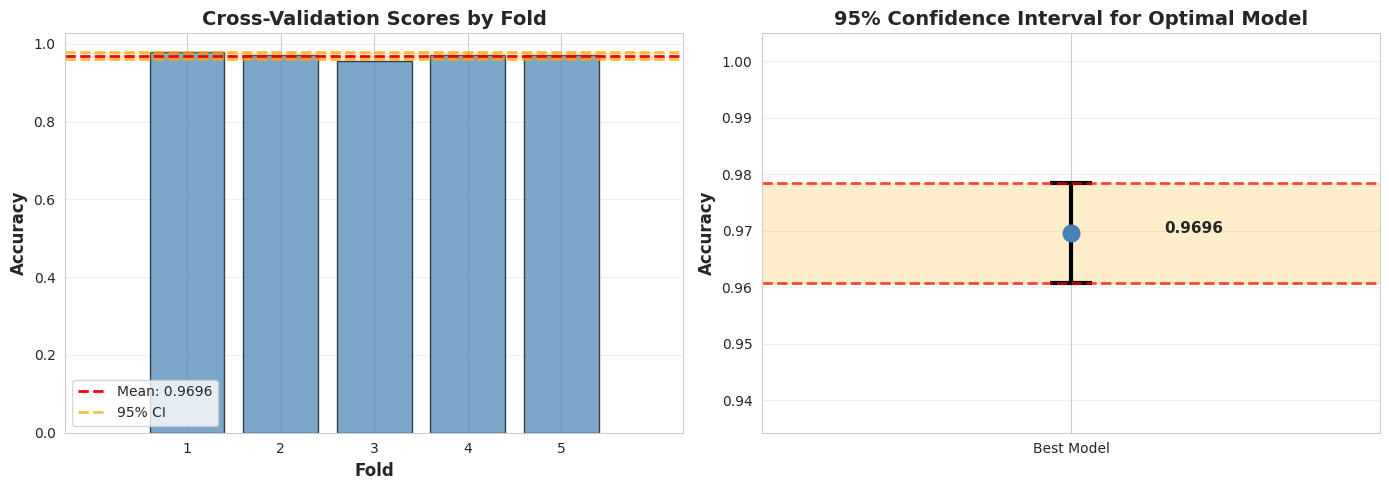

In [20]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

#claude sonnet 4.5 coached/validated these plot parameters
#plot 1: CV scores by fold
axes[0].bar(range(1, 6), cvScores, alpha=0.7, color='steelblue', edgecolor='black')
axes[0].axhline(meanCvScore, color='red', linestyle='--', linewidth=2, label=f'Mean: {meanCvScore:.4f}')
axes[0].axhline(ciLower, color='orange', linestyle='--', alpha=0.7, linewidth=2, label=f'95% CI')
axes[0].axhline(ciUpper, color='orange', linestyle='--', alpha=0.7, linewidth=2)
axes[0].fill_between(range(0, 7), ciLower, ciUpper, alpha=0.2, color='orange')
axes[0].set_xlabel('Fold', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Accuracy', fontsize=12, fontweight='bold')
axes[0].set_title('Cross-Validation Scores by Fold', fontsize=14, fontweight='bold')
axes[0].set_xticks(range(1, 6))
axes[0].legend()
axes[0].grid(axis='y', alpha=0.3)

#plot 2: Confidence interval visualization
axes[1].errorbar([1], [meanCvScore], yerr=[marginOfError],
                 fmt='o', markersize=12, capsize=15, capthick=3,
                 color='steelblue', ecolor='black', elinewidth=3)
axes[1].set_xlim([0.5, 1.5])
axes[1].set_ylim([meanCvScore - 4*marginOfError, meanCvScore + 4*marginOfError])
axes[1].set_ylabel('Accuracy', fontsize=12, fontweight='bold')
axes[1].set_title('95% Confidence Interval for Optimal Model', fontsize=14, fontweight='bold')
axes[1].set_xticks([1])
axes[1].set_xticklabels(['Best Model'])
axes[1].grid(axis='y', alpha=0.3)
axes[1].axhline(ciLower, color='red', linestyle='--', alpha=0.7, linewidth=2)
axes[1].axhline(ciUpper, color='red', linestyle='--', alpha=0.7, linewidth=2)
axes[1].fill_between([0.5, 1.5], ciLower, ciUpper, alpha=0.2, color='orange')
axes[1].text(1.15, meanCvScore, f'{meanCvScore:.4f}', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()


In [21]:
print("PART 4: STATISTICAL COMPARISON - MEDIUM vs BEST MODEL")
print("\n")

#perform 5-fold CV on medium model
mediumCvScores = cross_val_score(dtreeMedium, xTrain, yTrain, cv=5, scoring='accuracy')
mediumMean = np.mean(mediumCvScores)
mediumStd = np.std(mediumCvScores)

mediumMargin = tValue * (mediumStd / np.sqrt(numFolds))
mediumCiLower = mediumMean - mediumMargin
mediumCiUpper = mediumMean + mediumMargin

print("\nMedium Complexity Model (max_depth=8):")
print(f"  CV Scores: {mediumCvScores}")
print(f"  Mean CV Score: {mediumMean:.4f}")
print(f"  Standard Deviation: {mediumStd:.4f}")
print(f"  95% CI: [{mediumCiLower:.4f}, {mediumCiUpper:.4f}]")

print("\nBest Model (from Grid Search):")
print(f"  CV Scores: {cvScores}")
print(f"  Mean CV Score: {meanCvScore:.4f}")
print(f"  Standard Deviation: {stdCvScore:.4f}")
print(f"  95% CI: [{ciLower:.4f}, {ciUpper:.4f}]")

PART 4: STATISTICAL COMPARISON - MEDIUM vs BEST MODEL



Medium Complexity Model (max_depth=8):
  CV Scores: [0.93862816 0.94584838 0.93115942 0.93115942 0.93478261]
  Mean CV Score: 0.9363
  Standard Deviation: 0.0055
  95% CI: [0.9295, 0.9432]

Best Model (from Grid Search):
  CV Scores: [0.97833935 0.97111913 0.95652174 0.97101449 0.97101449]
  Mean CV Score: 0.9696
  Standard Deviation: 0.0071
  95% CI: [0.9608, 0.9784]


In [22]:
#check for overlap
hasOverlap = not (ciLower > mediumCiUpper or mediumCiLower > ciUpper)

print("\n")
print("STATISTICAL SIGNIFICANCE ANALYSIS:")

print(f"\nConfidence Interval Overlap: {'YES' if hasOverlap else 'NO'}")

if hasOverlap:
    print("\n The confidence intervals OVERLAP.")
    print("  Interpretation: There is NO statistically significant difference")
    print("  between the two models at the 95% confidence level.")
    print("\n  The performance difference could be due to random variation")
    print("  rather than a true difference in model quality.")
else:
    print("\n The confidence intervals DO NOT overlap.")
    print("  Interpretation: There IS a statistically significant difference")
    print("  between the two models at the 95% confidence level.")



STATISTICAL SIGNIFICANCE ANALYSIS:

Confidence Interval Overlap: NO

 The confidence intervals DO NOT overlap.
  Interpretation: There IS a statistically significant difference
  between the two models at the 95% confidence level.


In [23]:
#perform paired t-test
from scipy.stats import ttest_rel
tStatistic, pValue = ttest_rel(cvScores, mediumCvScores)

print(f"\nPaired t-test Results:")
print(f"  t-statistic: {tStatistic:.4f}")
print(f"  p-value: {pValue:.4f}")

if pValue < 0.05:
    print(f"   Result: Statistically significant difference (p < 0.05)")
    print(f"   We reject the null hypothesis that the models perform equally.")
else:
    print(f"   Result: No statistically significant difference (p >= 0.05)")
    print(f"   We fail to reject the null hypothesis that the models perform equally.")


Paired t-test Results:
  t-statistic: 10.0329
  p-value: 0.0006
   Result: Statistically significant difference (p < 0.05)
   We reject the null hypothesis that the models perform equally.


/tmp/ipython-input-2245730622.py:28: MatplotlibDeprecationWarning:

The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.



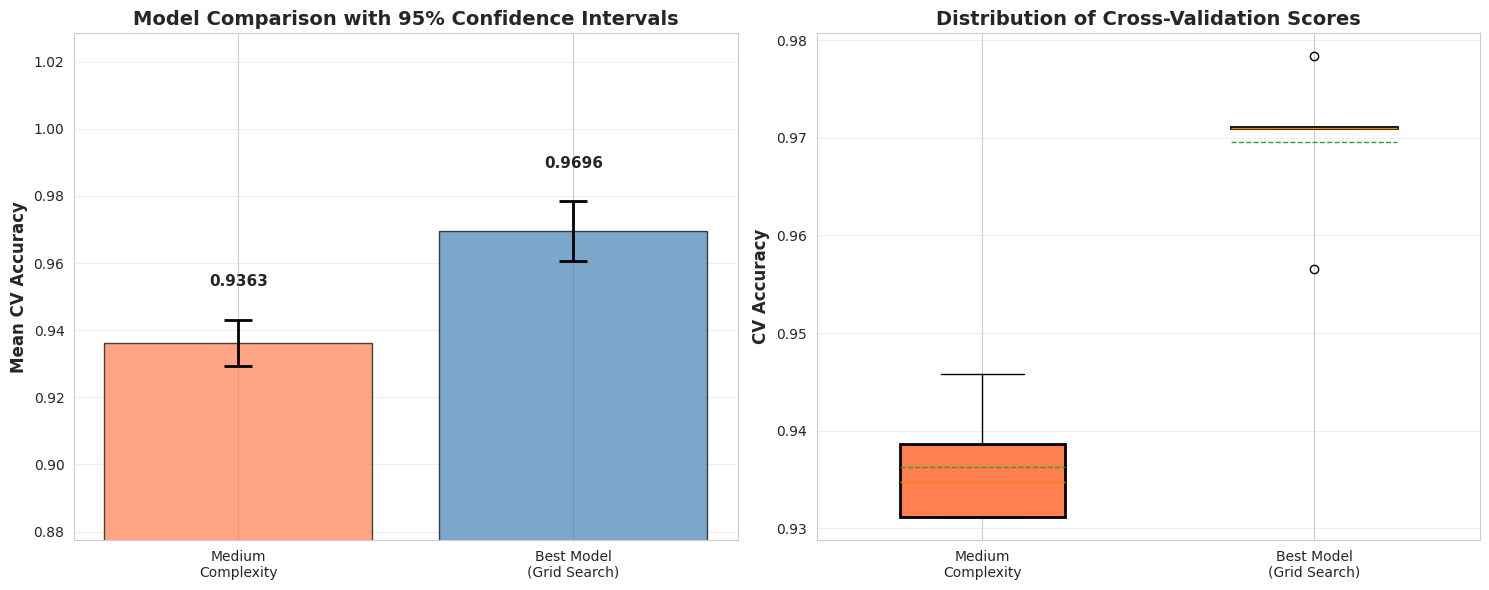

In [24]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

#claude sonnet 4.5 coached/validated these plot parameters
#plot 1: Mean CV Accuracy with Error Bars
modelsToCompare = ['Medium\nComplexity', 'Best Model\n(Grid Search)']
meanScores = [mediumMean, meanCvScore]
errorMargins = [mediumMargin, marginOfError]

xPositions = np.arange(len(modelsToCompare))
bars = axes[0].bar(xPositions, meanScores, alpha=0.7, color=['coral', 'steelblue'], edgecolor='black')
axes[0].errorbar(xPositions, meanScores, yerr=errorMargins, fmt='none', ecolor='black',
                 capsize=10, capthick=2, elinewidth=2)

for i, (meanScore, errorMargin) in enumerate(zip(meanScores, errorMargins)):
    axes[0].text(i, meanScore + errorMargin + 0.01, f'{meanScore:.4f}',
                 ha='center', fontsize=11, fontweight='bold')

axes[0].set_ylabel('Mean CV Accuracy', fontsize=12, fontweight='bold')
axes[0].set_title('Model Comparison with 95% Confidence Intervals', fontsize=14, fontweight='bold')
axes[0].set_xticks(xPositions)
axes[0].set_xticklabels(modelsToCompare)
axes[0].grid(axis='y', alpha=0.3)
axes[0].set_ylim([min(meanScores) - max(errorMargins) - 0.05,
                   max(meanScores) + max(errorMargins) + 0.05])

#plot 2: Box Plot Distribution
boxPlotData = [mediumCvScores, cvScores]
boxPlot = axes[1].boxplot(boxPlotData, labels=modelsToCompare, patch_artist=True,
                           widths=0.5, showmeans=True, meanline=True)
boxPlot['boxes'][0].set_facecolor('coral')
boxPlot['boxes'][1].set_facecolor('steelblue')

for box in boxPlot['boxes']:
    box.set_edgecolor('black')
    box.set_linewidth(2)

axes[1].set_ylabel('CV Accuracy', fontsize=12, fontweight='bold')
axes[1].set_title('Distribution of Cross-Validation Scores', fontsize=14, fontweight='bold')
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

In [25]:
print("\n")
print("MODEL SELECTION RECOMMENDATION:")

print("\nConsiderations:")
print(f"  1. Performance:")
print(f"     - Best Model Mean CV: {meanCvScore:.4f}")
print(f"     - Medium Model Mean CV: {mediumMean:.4f}")
print(f"     - Difference: {meanCvScore - mediumMean:.4f}")
print(f"\n  2. Statistical Significance:")
print(f"     - p-value: {pValue:.4f}")
print(f"     - CI Overlap: {'Yes' if hasOverlap else 'No'}")
print(f"\n  3. Model Complexity:")
print(f"     - Best Model Depth: {bestModel.get_depth()}")
print(f"     - Medium Model Depth: {dtreeMedium.get_depth()}")
print(f"     - Best Model Leaves: {bestModel.get_n_leaves()}")
print(f"     - Medium Model Leaves: {dtreeMedium.get_n_leaves()}")



MODEL SELECTION RECOMMENDATION:

Considerations:
  1. Performance:
     - Best Model Mean CV: 0.9696
     - Medium Model Mean CV: 0.9363
     - Difference: 0.0333

  2. Statistical Significance:
     - p-value: 0.0006
     - CI Overlap: No

  3. Model Complexity:
     - Best Model Depth: 11
     - Medium Model Depth: 8
     - Best Model Leaves: 73
     - Medium Model Leaves: 40


In [26]:
performanceDifference = meanCvScore - mediumMean

print("\n")
if not hasOverlap and pValue < 0.05:
    print("RECOMMENDATION: Choose the BEST MODEL from Grid Search")
    print("\n")
    print(f"\nReason: Statistically significant performance improvement")
    print(f"  - The best model shows {performanceDifference:.4f} higher accuracy")
    print(f"  - Confidence intervals do not overlap")
    print(f"  - p-value ({pValue:.4f}) < 0.05")

    #check for overfitting in best model
    if bestTrainAccuracy >= 0.99:
        print(f"\n  CAUTION: Best model training accuracy is {bestTrainAccuracy:.4f}")
        print(f"     This is very high and suggests potential memorization.")
        print(f"     Despite better CV performance, consider the medium model")
        print(f"     for better real-world generalization.")
    else:
        print(f"\n✓ Best model training accuracy ({bestTrainAccuracy:.4f}) is reasonable.")
        print(f"  Conclusion: The added complexity is justified by measurable performance gain.")

elif abs(performanceDifference) < 0.01:
    print("RECOMMENDATION: Choose the MEDIUM COMPLEXITY MODEL")
    print(f"\nReason: Similar performance with lower complexity (Occam's Razor)")
    print(f"  - Performance difference ({performanceDifference:.4f}) is negligible")
    print(f"  - Simpler model is easier to interpret and faster to run")
    print(f"\nConclusion: Prefer simplicity when performance differences are minimal.")
else:
    print("RECOMMENDATION: Context-Dependent Choice")
    print(f"\nReason: No statistically significant difference detected")
    print(f"  - Confidence intervals overlap: {hasOverlap}")
    print(f"  - p-value ({pValue:.4f}) >= 0.05")
    print(f"  - Performance difference: {performanceDifference:.4f}")

    #additional check for memorization
    if bestTrainAccuracy >= 0.99:
        print(f"\n  IMPORTANT: Best model training accuracy is {bestTrainAccuracy:.4f}")
        print(f"     This very high score suggests memorization of training data.")
        print(f"     RECOMMENDATION: Choose the MEDIUM COMPLEXITY MODEL")
        print(f"     - Medium model trains at {trainAccuracyMedium:.4f} (more reasonable)")
        print(f"     - Medium model avoids memorization")
        print(f"     - CV performance is statistically similar")
    else:
        print(f"\nConsider:")
        print(f"  - Choose MEDIUM model if interpretability/speed is important")
        print(f"  - Choose BEST model if maximizing accuracy is critical")
        print(f"\nConclusion: Both models are statistically similar. Choose based on")
        print(f"            your priorities (simplicity vs. marginal performance gain).")



RECOMMENDATION: Choose the BEST MODEL from Grid Search



Reason: Statistically significant performance improvement
  - The best model shows 0.0333 higher accuracy
  - Confidence intervals do not overlap
  - p-value (0.0006) < 0.05

  CAUTION: Best model training accuracy is 0.9942
     This is very high and suggests potential memorization.
     Despite better CV performance, consider the medium model
     for better real-world generalization.


In [27]:
print("\n")
print("SUMMARY OF ANALYSIS")

print("\n1. Model Complexity Analysis:")
print(f"   - Low Complexity: {'Underfitting' if testAccuracyLow < 0.85 else 'Acceptable'}")
print(f"   - Medium Complexity: {'Good Fit' if abs(trainAccuracyMedium - testAccuracyMedium) < 0.05 else 'Overfitting' if trainAccuracyMedium - testAccuracyMedium > 0.05 else 'Underfitting'}")
print(f"   - High Complexity: {'Overfitting' if trainAccuracyHigh - testAccuracyHigh > 0.05 else 'Good Fit'}")

print("\n2. Best Parameters Found:")
for paramName, paramValue in gridSearch.best_params_.items():
    print(f"   - {paramName}: {paramValue}")

print(f"\n3. Performance Metrics:")
print(f"   - Best Model CV Score: {meanCvScore:.4f} (±{marginOfError:.4f})")
print(f"   - Medium Model CV Score: {mediumMean:.4f} (±{mediumMargin:.4f})")

print(f"\n4. Statistical Test:")
print(f"   - Paired t-test p-value: {pValue:.4f}")
print(f"   - Statistical significance: {'Yes (p < 0.05)' if pValue < 0.05 else 'No (p >= 0.05)'}")



SUMMARY OF ANALYSIS

1. Model Complexity Analysis:
   - Low Complexity: Underfitting
   - Medium Complexity: Good Fit
   - High Complexity: Good Fit

2. Best Parameters Found:
   - criterion: entropy
   - max_depth: 11
   - min_samples_leaf: 1
   - min_samples_split: 2

3. Performance Metrics:
   - Best Model CV Score: 0.9696 (±0.0088)
   - Medium Model CV Score: 0.9363 (±0.0068)

4. Statistical Test:
   - Paired t-test p-value: 0.0006
   - Statistical significance: Yes (p < 0.05)
